## Predictive Analysis of Cancer Data Using a Machine Learning Classification Model

### Introduction

Lorem ipsum blah blah blah.

In [1]:
library(tidyverse)
library(repr)
library(recipes)
library(cowplot)
library(GGally)
library(tidymodels)
install.packages('kknn')
library(kknn)
library(ggplot2)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘recipes’


The following object is masked from ‘package:stringr’:

    fixed


The following object is masked from ‘package:stats’:

    step



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ────

### Preliminary Exploratory Data Analysis

We will first read the dataset from the web into R, and then clean our data. Here, we notice that the class column has 0's and 1's. The 1's mean that the observation is not a significant heart disease, and 0's mean it is a significant heart disease.

In [2]:
# reading the data from the web and adding a factor output variable called 'class'
# also removing columns id and diagnosis because we do not require them anymore
cancer_data <- read_csv('https://raw.githubusercontent.com/NISH-Original/Heart-Attack-Analysis/main/Cancer_Data.csv') |>
                    mutate(class = as.factor(diagnosis)) |>
                    select(radius_mean:class)

print('Table 1')
head(cancer_data, 10)

Rows: 569 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): diagnosis
dbl (31): id, radius_mean, texture_mean, perimeter_mean, area_mean, smoothne...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Table 1"


radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,⋯,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,⋯,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,⋯,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,⋯,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,⋯,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,⋯,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M
12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,⋯,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,M
18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,⋯,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,M
13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,⋯,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,M
13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,⋯,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,M


We now have to scale all the potential predictor variables so that the prediction is not influenced by the different scales of all the predictors, thus avoiding inaccurate predictions. Also, we will only use the 'mean' statistics in the dataset for prediction.

In [3]:
required_cols <- c('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'class')

cancer_scaled <- cancer_data |>
                    select(all_of(required_cols)) |>
                    mutate(across(where(is.numeric), scale))

head(cancer_scaled)

radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,class
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
1.0960995,-2.0715123,1.2688173,0.9835095,1.5670875,3.2806281,2.65054179,2.5302489,2.215565542,2.2537638,M
1.8282120,-0.3533215,1.6844726,1.9070303,-0.8262354,-0.4866435,-0.02382489,0.5476623,0.001391139,-0.8678888,M
1.5784992,0.4557859,1.5651260,1.5575132,0.9413821,1.0519999,1.36227979,2.0354398,0.938858720,-0.3976580,M
-0.7682333,0.2535091,-0.5921661,-0.7637917,3.2806668,3.3999174,1.91421287,1.4504311,2.864862154,4.9066020,M
1.7487579,-1.1508038,1.7750113,1.8246238,0.2801253,0.5388663,1.36980615,1.4272370,-0.009552062,-0.5619555,M
-0.4759559,-0.8346009,-0.3868077,-0.5052059,2.2354545,1.2432416,0.86554001,0.8239307,1.004517928,1.8883435,M


Now we can continue with splitting 75% of our data into training and and 25% testing.

In [4]:
set.seed(100)

cancer_split <- cancer_scaled |>
                    initial_split(prop=3/4, strata=class)
cancer_training <- training(cancer_split)
cancer_testing <- testing(cancer_split)

Now, we can search for any missing data in our training set

In [5]:
missing_data <- cancer_training |>
                    map_df(~sum(is.na(.)))

print("Table 4")
pivot_longer(missing_data, 
            cols = everything(), 
            names_to = 'column',
            values_to = 'missing data')

[1] "Table 4"


column,missing data
<chr>,<int>
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


Fortunately, we can see that we do not have empty data to deal with, so we can proceed to find out how many observations exist for each class in our training set.

In [6]:
class_counts <- cancer_training |>
                    group_by(class) |>
                    summarize(count = n())

print("Table 5")
class_counts

[1] "Table 5"


class,count
<fct>,<int>
B,267
M,159


The amount of observations with Benign and Malignant classes are fairly balanced, thus upsampling would not be required. Now, we find the means of the variables based on our two classes

In [7]:
means <- cancer_training |>
            group_by(class) |>
            summarize_at(vars(everything()), mean)

print("Table 6")
means

[1] "Table 6"


class,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B,-0.5887666,-0.3022494,-0.5999253,-0.5674604,-0.2755370,-0.4923580,-0.5746053,-0.6144650,-0.2279652,-0.001783352
M,0.9468287,0.5690101,0.9663173,0.9196450,0.4291373,0.8161638,0.8848127,0.9871295,0.4619462,0.015615599


We see that the means are very different for classes B and M which helps in differentiating them from each other. We will now plot them in pairs to better visualise the correlations.

NULL

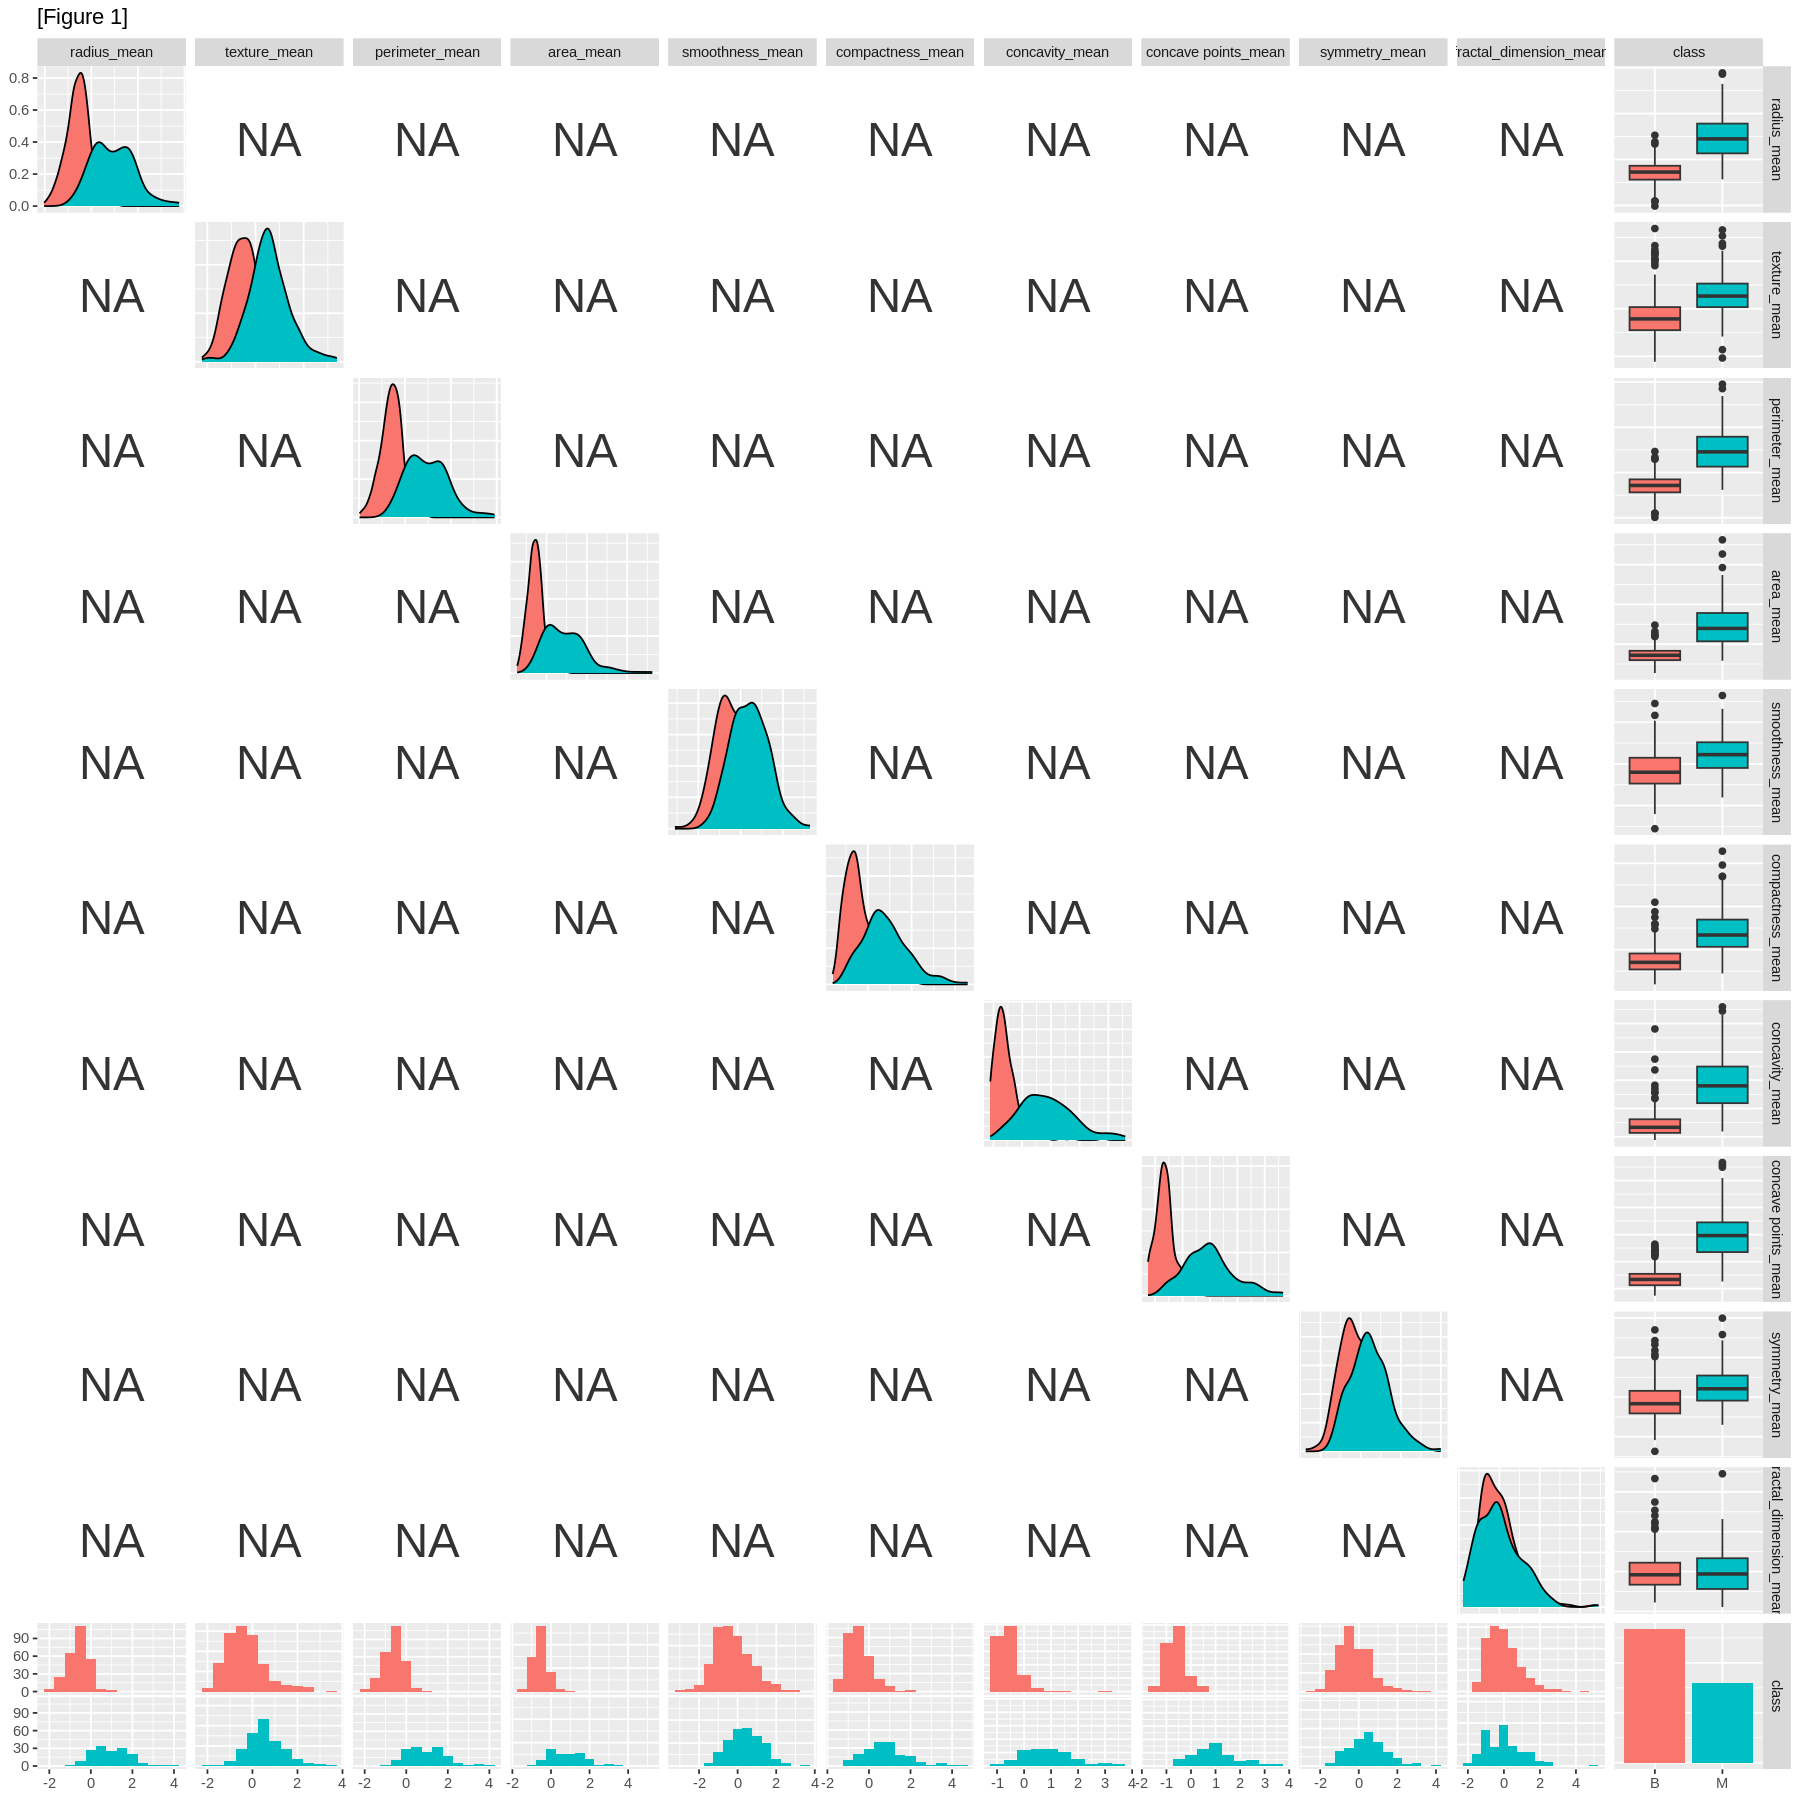

In [8]:
options(repr.plot.width = 15, repr.plot.height = 15)

pairs_plot <- cancer_training |>
                ggpairs(aes(color=class), 
                        lower=list(combo=wrap("facethist", binwidth=0.5))) +
                ggtitle("[Figure 1]")
                labs(color=class) +
                theme(text=element_text(size=30))
 
pairs_plot

We can now visualize that the overlap between the classes for each predictor variable is relatively low, which is ideal for classification. Thus, we can go ahead with these predictor variables.

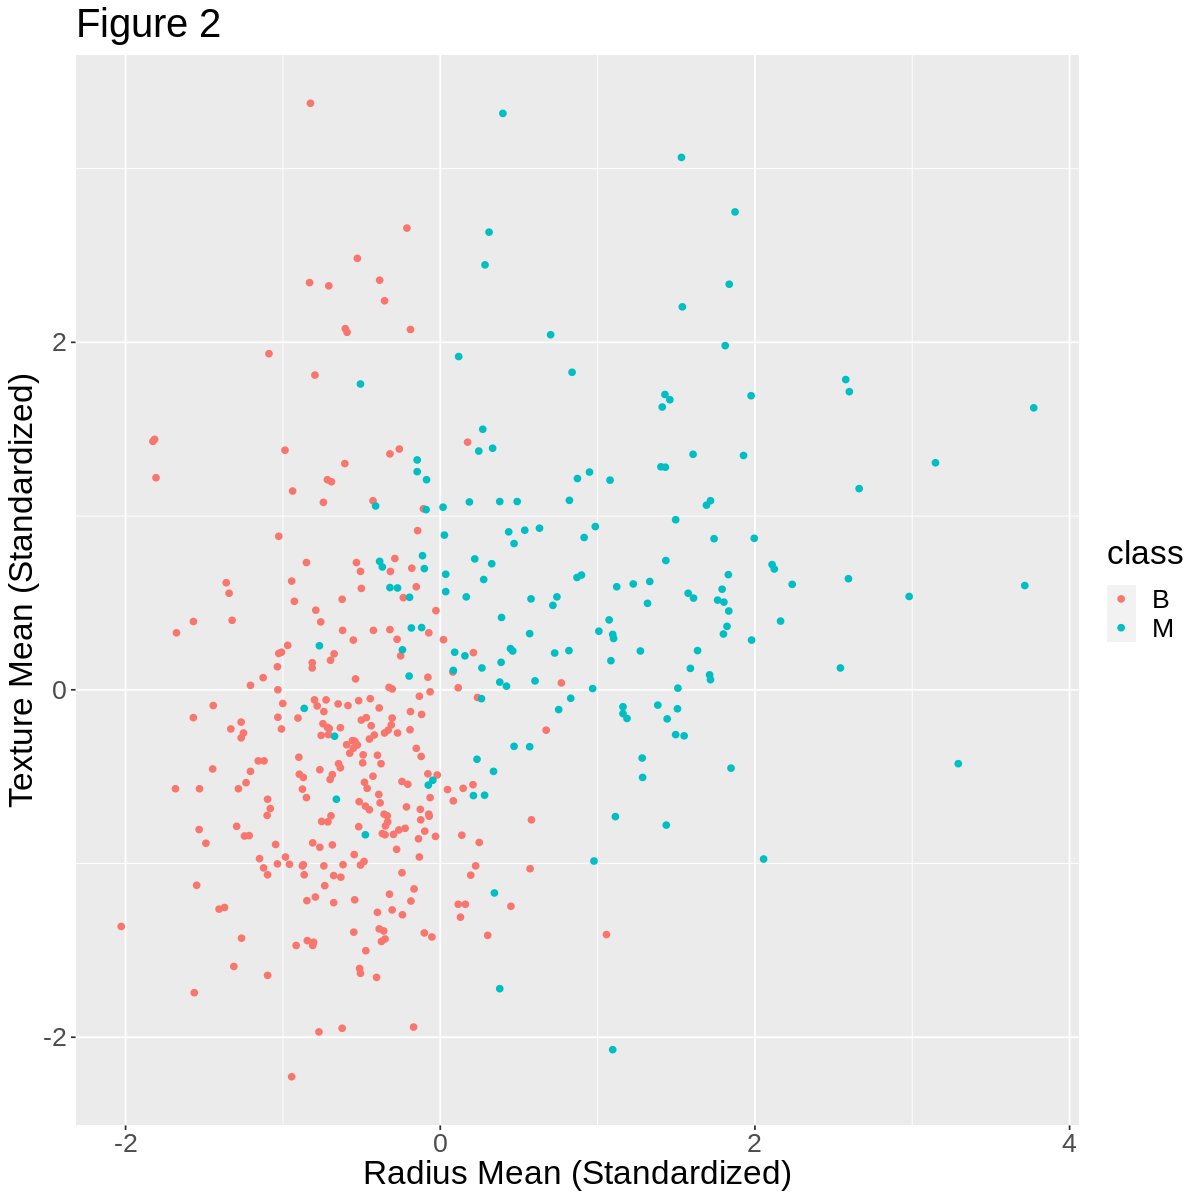

In [9]:
options(repr.plot.width = 10, repr.plot.height = 10)

cancer_viz_1 <- cancer_training |>
                    ggplot(aes(x=radius_mean, y=texture_mean, color=class)) +
                    ggtitle("Figure 2") +
                    geom_point() +
                    xlab('Radius Mean (Standardized)') +
                    ylab('Texture Mean (Standardized)') +
                    theme(text = element_text(size = 20))

cancer_viz_1

Above, we see a general trend that the observation is Benign for lower values of radius and texture mean, while Malignant for the higher values. This gives us insight into the varying nature of both the classes and how they can be differentiated using our classification model. 

### Training The Model

Now, we use $K$-nearest neighbors classification and cross validation of 5 folds in order to train our data. Firstly, we will tune the number of neighbors to find the ideal value for $K$. We will thus test for all values of $K$ from 1 to 20 in steps of 2.

In [13]:
cancer_recipe <- recipe(class ~ ., data=cancer_training) |>
                    step_scale(all_predictors()) |>  
                    step_center(all_predictors())

knn_tune <- nearest_neighbor(weight_func="rectangular", neighbors=tune()) |>
                        set_engine("kknn") |>
                        set_mode("classification")

cancer_vfold <- vfold_cv(cancer_training, v=5, strata=class)

gridvals <- tibble(neighbors=seq(from=1, to=20, by=1))

cancer_workflow <- workflow() |>
                       add_recipe(cancer_recipe) |>
                       add_model(knn_tune) |>
                       tune_grid(resamples=cancer_vfold, grid=gridvals) |>
                       collect_metrics()

knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Next, we collect the accuracy metrics and then plot them against the $K$ values in order to find the most suitable value for our model.

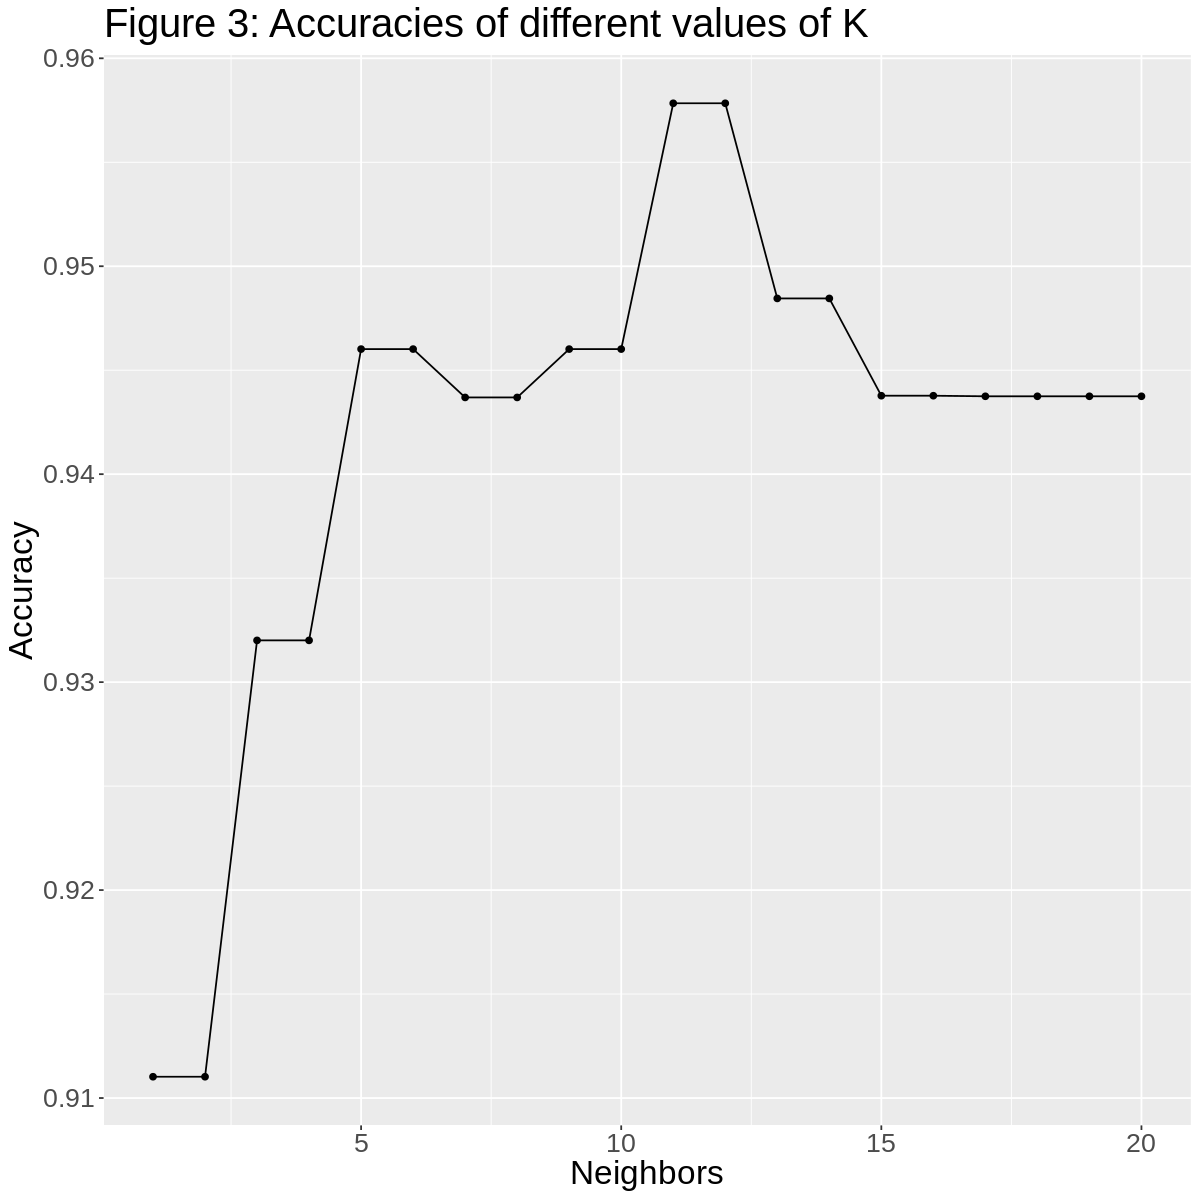

In [14]:
options(repr.plot.width = 10, repr.plot.height = 10)

accuracies <- cancer_workflow |>
                  filter(.metric == "accuracy") |>
                  select(neighbors, mean)

accuracy_plot <- ggplot(accuracies, aes(x=neighbors, y=mean)) +
                     geom_line() +
                     geom_point() +
                     labs(x = "Neighbors", y = "Accuracy", 
                          title = "Figure 3: Accuracies of different values of K") +
                     theme(text = element_text(size = 20))

accuracy_plot

Here, we see that the accuracy is the greatest for $K = 11$. Thus, we can go ahead and train the model with 11 neighbors.

In [16]:
knn_tune_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) |>
                set_engine("kknn") |>
                set_mode("classification")

cancer_fit <- workflow() |>
                add_recipe(cancer_recipe) |>
                add_model(knn_tune_2) |>
                fit(data = cancer_training)

Now, we can make predictions on the testing data.

### Making Predictions

In [17]:
cancer_predictions <- predict(cancer_fit , cancer_testing) |>
       bind_cols(cancer_testing)


print("Table 7")
head(cancer_predictions)

[1] "Table 7"


.pred_class,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,class
<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
M,1.8282120,-0.3533215,1.6844726,1.9070303,-0.8262354,-0.48664348,-0.02382489,0.5476623,0.001391139,-0.8678888,M
M,1.5784992,0.4557859,1.5651260,1.5575132,0.9413821,1.05199990,1.36227979,2.0354398,0.938858720,-0.3976580,M
M,1.7487579,-1.1508038,1.7750113,1.8246238,0.2801253,0.53886631,1.36980615,1.4272370,-0.009552062,-0.5619555,M
M,1.1698783,0.1605082,1.1371245,1.0943320,-0.1230280,0.08821762,0.29980860,0.6463664,-0.064268069,-0.7616620,M
M,-0.4731182,1.1044669,-0.3291921,-0.5086158,1.5813080,2.56110495,1.73734341,0.9409324,0.796597103,2.7806489,M
M,1.6125509,0.6650378,1.5651260,1.7194845,0.1386306,-0.03107174,0.74135507,1.1870484,-0.837587629,-1.2531381,M


### Calculating Accuracies

In [18]:
cancer_accuracy <- cancer_predictions |>
                     metrics(truth = class, estimate = .pred_class) 

print("Table 8")
cancer_accuracy

[1] "Table 8"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9300699
kap,binary,0.8535136


We see that we have an accuracy of 93%, which is very good for a classification model. We can also have a look at the confusion matrix.

In [19]:
conf_mat <- cancer_predictions |> 
                conf_mat(truth = class, estimate = .pred_class)

print("Table 9")
conf_mat

[1] "Table 9"


          Truth
Prediction  B  M
         B 82  2
         M  8 51

### Visualising the Accuracy of the Model

We can now try and visualize the accuracy of our predictions by plotting some predictors of the testing data and their predictions to see how similar they are to each other. For this instance, let's just see the comparisons between the plots of radius mean versus the texture mean of the observations.

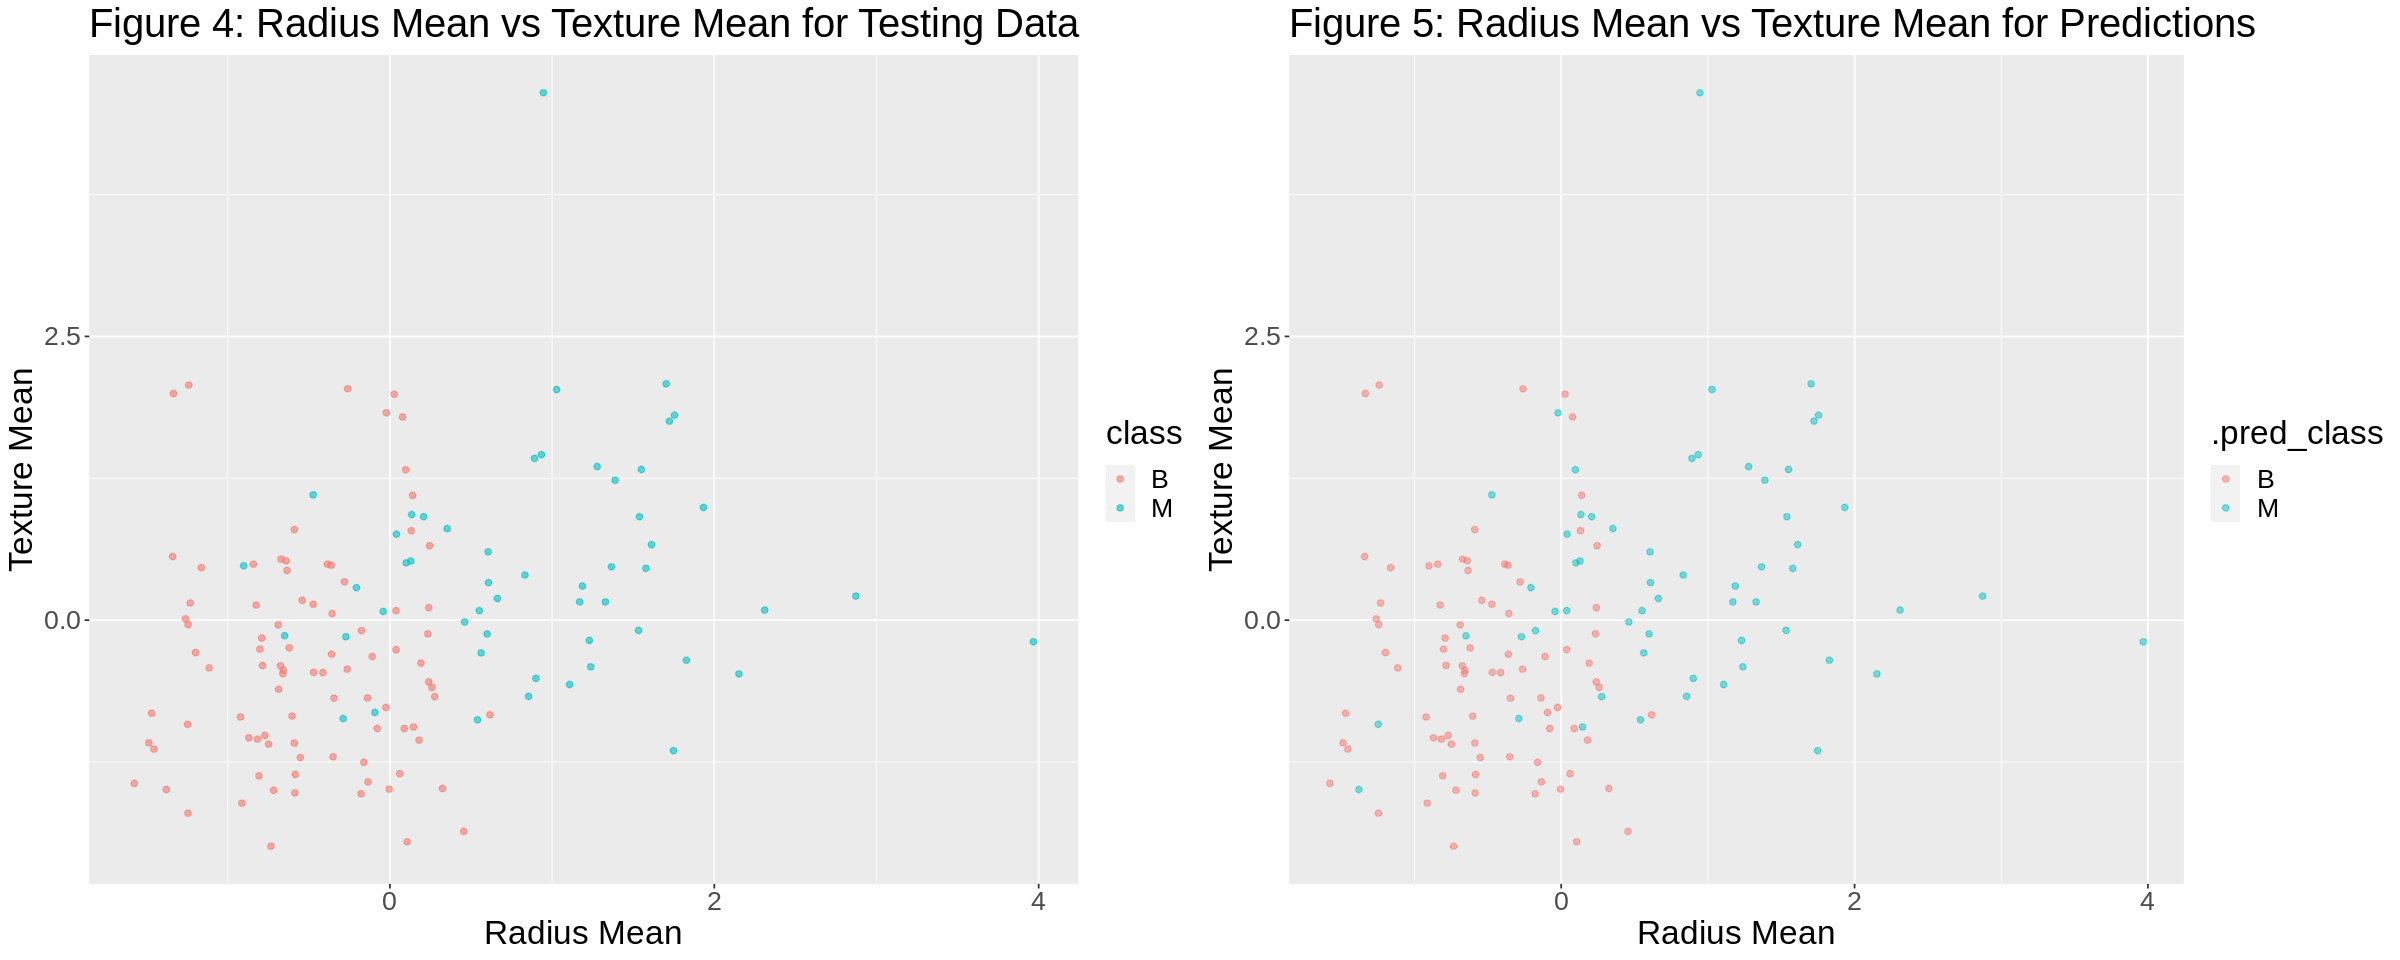

In [24]:
options(repr.plot.width = 20, repr.plot.height = 8)

accuracy_test <- ggplot(cancer_testing, aes(x=radius_mean, y=texture_mean, color=class)) + 
                                geom_point(alpha=0.6) + 
                                ggtitle('Figure 4: Radius Mean vs Texture Mean for Testing Data') +
                                labs(x= 'Radius Mean', y= 'Texture Mean') +
                                theme(text=element_text(size=20))

accuracy_pred <- ggplot(cancer_predictions, aes(x=radius_mean, y=texture_mean, color=.pred_class)) + 
                                geom_point(alpha = 0.5) + 
                                ggtitle('Figure 5: Radius Mean vs Texture Mean for Predictions') +
                                labs(x= 'Radius Mean', y= 'Texture Mean') +
                                theme(text=element_text(size=20))

plot_grid(accuracy_test, accuracy_pred)

From the visualizations above, we see that the prediction graphs look very similar to the testing data which shows that we have a pretty accurate model for predicting benign or malignant cancer cells from the data.